## M9-L1 Problem 2

Recall the von Mises stress prediction problem from the module 6 homework. In this problem, you will compute the $R^2$ score for a few model predictions for a single shape in this dataset. You will also plot the predicted-vs-actual stress for each model.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

float32 = np.float32

In [3]:
xs= np.load("data/L1P2/xs.npy")
ys= np.load("data/L1P2/ys.npy")
gt = np.load("data/L1P2/gt.npy")
model1= np.load("data/L1P2/model1.npy")
model2= np.load("data/L1P2/model2.npy")
model3= np.load("data/L1P2/model3.npy")

## Visualizing data

Run the following cell to load the data and visualize the 3 model predictions.

- `gt` is the ground truth von Mises stress vector
- `model1` is the vector of stress predictions for model 1
- `model2` is the vector of stress predictions for model 2
- `model3` is the vector of stress predictions for model 3

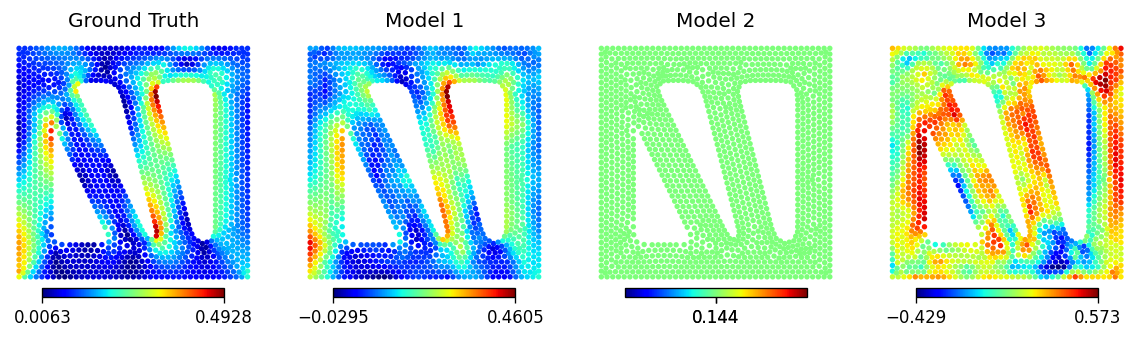

In [4]:
def plot_shape(x, y, stress, lims=None):

    if lims is None:
        lims = [min(stress),max(stress)]    

    plt.scatter(x,y,s=5,c=stress,cmap="jet",vmin=lims[0],vmax=lims[1])
    plt.colorbar(orientation="horizontal", shrink=.75, pad=0,ticks=lims)
    plt.axis("off")
    plt.axis("equal")

def plot_all(x, y, gt, model1, model2, model3):
    plt.figure(figsize=[12,3.2], dpi=120)
    plt.subplot(141)
    plot_shape(x, y, gt)
    plt.title("Ground Truth")

    plt.subplot(142)
    plot_shape(x, y, model1)
    plt.title("Model 1")

    plt.subplot(143)
    plot_shape(x, y, model2)
    plt.title("Model 2")

    plt.subplot(144)
    plot_shape(x, y, model3)
    plt.title("Model 3")

    plt.show()

plot_all(xs, ys, gt, model1, model2, model3)

## Computing $R^2$

Calculate the $R^2$ value for each model and print the results.


In [5]:
# YOUR CODE GOES HERE

models = [model1, model2, model3]

for model in models:
    r2_gt_model = r2_score(gt, model)
    print(f"R2 score: {r2_gt_model}")

# r2_gt_model1 = r2_score(gt, model1)
# r2_gt_model2 = r2_score(gt, model2)
# r2_gt_model3 = r2_score(gt, model3)

R2 score: 0.8727994044645364
R2 score: 0.0
R2 score: -3.0451391287323784


## Plotting predictions vs ground truth

Complete the function definition below for `plot_r2(gt, pred, title)`

Then create plots for all 3 models.

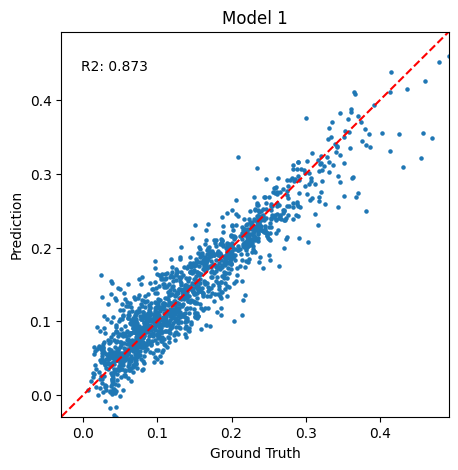

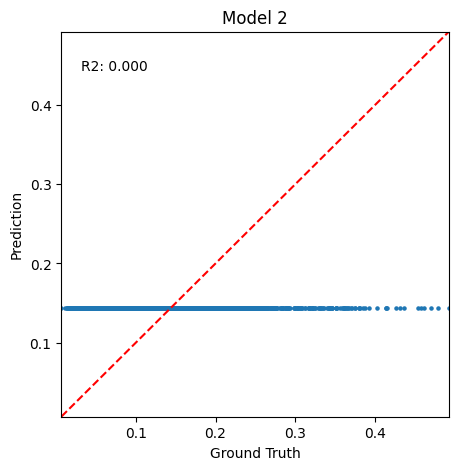

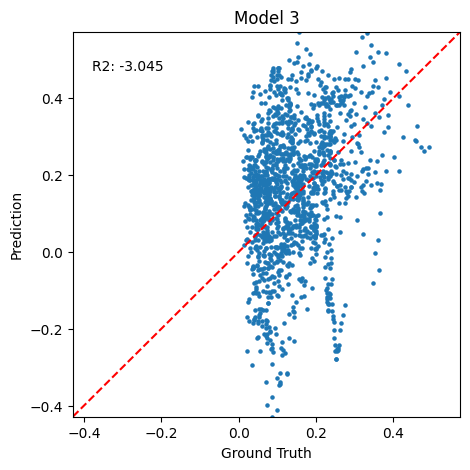

In [6]:
def plot_r2(gt, pred, title):
    plt.figure(figsize=[5,5])

    # YOUR CODE GOES HERE
    plt.scatter(gt, pred, s=5)
    plt.text(0.05, 0.9, f"R2: {r2_score(gt, pred):.3f}", transform=plt.gca().transAxes)

    
    plt.plot([-1000,1000], [-1000,1000],"r--")

    all = np.concatenate([gt, pred])
    plt.xlim(np.min(all), np.max(all))
    plt.ylim(np.min(all), np.max(all))
    plt.xlabel("Ground Truth")
    plt.ylabel("Prediction")
    plt.title(title)
    plt.show()

plot_r2(gt, model1,"Model 1")
plot_r2(gt, model2,"Model 2")
plot_r2(gt, model3,"Model 3")

## Questions

1. Model 2 has an $R^2$ of exactly 0. Why?  

    The total sum of squares is equal to the sum of squared residuals. The model's predicted value is equal to the ground truth value.

2. Model 3 has an $R^2$ less than 0. What does this mean?  

    It implies that the predicted machine learning model fits the data worse than the mean ground truth value. The model is incorrectly defined and thus an unreliable model.
